# IBM Applied DataScience Capstone Project 
   
   

   
*Which boroughs should Sub-Saharan Africans aim to lodge in during their holiday visits to London (UK)?*

---

## Project Introduction

**London (UK) attracts a great deal of tourists every year and is considered home to a large African diaspora. It has become a popular travel destination for a lot of English speaking sub-Saharan Africans with many coming over to either visit friends and relatives, come for holidays or strictly for business.**

**According to UK Government records, over a quarter of a million (> 250,000)  visitors in total ,i.e. on average, have come annually to the UK from the following sub-Saharan countries i.e. Nigeria, Kenya, Ghana, Uganda and Zimbabwe from 2004 to 2018.** 

**The links between the UK and these African nations are deep, far reaching and rooted both in their shared past and partnership for the future**

---

## Business Problem

**A Travel Agency in the business of arranging holiday packages in Africa has struggled in the past to satisfy some of its customers on the choice of location for the hotels selected for them during their visit to London UK.** 

**In particular, the dissatisfaction has mostly been prominent amongst clients from five (5) sub-Saharan countries with ties to UK i.e. Nigeria, Ghana, Kenya, Uganda and Zimbabwe. 
Feedback from a recent survey carried out by the Travel Agency reveals the top three (3) preferences which tourist from these nations look out for when embarking on a visit to London. These preferences, in addition to lodging in a nice hotel, include their accessibility to;**

+ Major Shopping Centres
+ Popular Attractions / Sites
+ Good Restaurants (preferably with menu including spicy options)

**In providing a solution to this challenge , it has been proposed to the Travel Agency that machine learning analysis be carried out to help determine the cluster of London Boroughs which fit their customers’ preferences.** 

**The underlying principle behind the analysis is that an unsupervised machine learning technique is applied to reliable data in helping to create clusters of boroughs situated in London UK which have similar venue categories within their vicinity.**

**The results obtained from the analyses provides the Travel Agency with relevant knowledge and information needed in arranging the packaged holidays for their clients.** 

---


## Project Data

**In carrying out the machine learning clustering analysis required to determine the suitable London Boroughs which fit perfectly with the preferences of the identified sub-Saharan African tourist, relevant data was obtained from the credible sources as follows;**

- List of Boroughs located in London UK 
    - Credible data was sourced from the UK government website (https://data.london.gov.uk/dataset/london-borough-profiles)

+ Geo-coordinates of the Boroughs in London UK
    + Geo-coordinates of the London Boroughs was obtained with the help of the GeoPy library. It was observed during the data wrangling process i.e. before running the extraction of the geo co-ordinates, some of the Boroughs had to be suffixed with “London” to enable the programme retrieve the right and accurate geo-coordinate from the actual Borough located in London UK.

+ Top venues in each London Borough
    + Detailed data for the top venues situated in the vicinity of each London Borough was obtained using the Foursquare API.

+ Some other informative data mentioned in the report include
    + An indication of UK visitor numbers from sub-Saharan Africa was obtained from a credible UK government website
https://www.gov.uk/government/publications/immigration-statistics-year-ending-june-2019

---



## Project Methodology

**The methodology adopted for this project is**

**This section discusses the approach adopted in execution of the project using appropriate Python scripts with support from Python Libraries like Pandas, GeoPy, Matplotlib, Scikit-learn and Folium.**

**The first step in carrying out the project involved the importation of these various Python support libraries before the data is then read, explored and processed for machine learning analyses.**

**The data ,which has been obtained from reliable sources, will be prepared for machine learning analyses principally to segment the London Boroughs into clusters based on the unique venues associated with them.** 

**The data preparation process involves the extraction and addition of each borough’s geo-coordinates (Latitude and Longitude)using the GeoP library into the dataframe.**

**As the data was being further explored, I proceeded to obtain details of the unique venues located within a 1km radius of each borough using the Foursquare API and incorporated the results into the dataframe.**

**The dataframe, now containing details of the unique venue categories associated with each borough, was further processed to enable the application of the unsupervised Machine Learning technique for segmentation of the boroughs into clusters. The machine learning technique used during the execution of the project is K-means clustering algorithm.** 

**To obtain and identify the optimal number of clusters to apply during the machine learning process, I made use of inertia (elbow rule) method. The data was then analysed using the K-means clustering algorithm and the  optimal number of clusters obtained above applied.**

**The results generated cluster labels which was then assigned to each Borough features as part of the Pandas dataframe.**

---


In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium
import folium # map rendering library

print('Libraries imported.')


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0          conda-forge
    geopy:           

In [2]:
# The code was removed by Watson Studio for sharing.

,Borough,Inner/Outer London
0,City of London,Inner London
1,Barking and Dagenham,Outer London
2,Barnet,Outer London
3,Bexley London,Outer London
4,Brent London,Outer London


In [3]:
df_London.shape

(33, 2)

In [4]:
#Create Dataframe containing both Latitude and Longitude details

column_names = ['Borough', 'Inner/Outer London','Latitude', 'Longitude'] 

# instantiate the dataframe
df_Boroughs = pd.DataFrame(columns=column_names)

df_Boroughs

,Borough,Inner/Outer London,Latitude,Longitude


In [5]:
Borough = df_London['Borough']
Region = df_London['Inner/Outer London']
location = None
latitude = None
longitude = None

for data in range(0, len(Borough)):
    Bgh = Borough[data]
    London_region = Region[data]
        
    geolocator = Nominatim(user_agent="Ldn-application")
    location = geolocator.geocode('{}'.format(Bgh))
    latitude = location.latitude
    longitude = location.longitude

    df_Boroughs = df_Boroughs.append({ 'Borough':Bgh,'Inner/Outer London':London_region,'Latitude': location.latitude,'Longitude': location.longitude}, ignore_index=True)

## Obtain the Coordinates of the London Borough including city of London. 

In [6]:
df_Boroughs

,Borough,Inner/Outer London,Latitude,Longitude
0,City of London,Inner London,51.515618,-0.091998
1,Barking and Dagenham,Outer London,51.554117,0.150504
2,Barnet,Outer London,51.653090,-0.200226
3,Bexley London,Outer London,51.441679,0.150488
4,Brent London,Outer London,51.563826,-0.275760
5,Bromley,Outer London,51.402805,0.014814
6,Camden London,Inner London,51.542305,-0.139560
7,Croydon,Outer London,51.371305,-0.101957
8,Ealing,Outer London,51.512655,-0.305195
9,Enfield,Outer London,51.652085,-0.081018


In [7]:
df_Boroughs.shape

(33, 4)

In [8]:
geolocator = Nominatim(user_agent="Ldn-application")
location = geolocator.geocode('London')
latitude = location.latitude
longitude = location.longitude

print('The geographical coordinate of London are {}, {}.'.format(latitude, longitude))

The geographical coordinate of London are 51.5073219, -0.1276474.


In [9]:
map_London = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, district in zip(df_Boroughs['Latitude'], df_Boroughs['Longitude'], df_Boroughs['Borough']):
    label = '{}'.format(Borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_London)  
    
map_London

### FourSquare Credentials

In [10]:
CLIENT_ID = 'CDPARZJDZUPFEVDGVV2UASFCQKP443NAO3RZTBSD5HFZNTBV' # your Foursquare ID
CLIENT_SECRET = '41BFMZ4QOMSV33QAL5BS4IN5HMAU0XWFNK2CI51EGBGKLX0I' # your Foursquare Secret
VERSION = '20200706' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CDPARZJDZUPFEVDGVV2UASFCQKP443NAO3RZTBSD5HFZNTBV
CLIENT_SECRET:41BFMZ4QOMSV33QAL5BS4IN5HMAU0XWFNK2CI51EGBGKLX0I


In [11]:
#Exploring the first Borough in London

df_Boroughs.loc[0, 'Borough']

'City of London'

In [12]:
Borough_latitude = df_Boroughs.loc[0, 'Latitude'] # Borough latitude value
Borough_longitude = df_Boroughs.loc[0, 'Longitude'] # Borough longitude value

Borough_name = df_Boroughs.loc[0, 'Borough'] # Borough name

print('Latitude and longitude values of {} are {}, {}.'.format(Borough_name, 
                                                               Borough_latitude, 
                                                               Borough_longitude))

Latitude and longitude values of City of London are 51.5156177, -0.0919983.


In [13]:
# type your answer here
latitude = Borough_latitude
longitude = Borough_longitude
radius = 1000
LIMIT = 200

url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=CDPARZJDZUPFEVDGVV2UASFCQKP443NAO3RZTBSD5HFZNTBV&client_secret=41BFMZ4QOMSV33QAL5BS4IN5HMAU0XWFNK2CI51EGBGKLX0I&ll=51.5156177,-0.0919983&v=20200706&radius=1000&limit=200'

In [14]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f11ca9a915b8a1e857411e3'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'City of London',
  'headerFullLocation': 'City of London, London',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 185,
  'suggestedBounds': {'ne': {'lat': 51.52461770900001,
    'lng': -0.077562840684187},
   'sw': {'lat': 51.50661769099999, 'lng': -0.106433759315813}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '58933377469aef72f3707afe',
       'name': 'The Ned Hotel',
       'location': {'address': '27 Poultry',
        'lat': 51.51375523989037,
        'lng': -0.09006653956021182,
        'labeledLatLngs': [{'label': 'display',
          'lat': 

In [15]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [16]:
#Clean up the JSON and structure into Pandas Dataframe

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,The Ned Hotel,Hotel,51.513755,-0.090067
1,Goodman Steak House Restaurant,Steakhouse,51.514398,-0.090745
2,The Merchant House,Cocktail Bar,51.513264,-0.093039
3,Daunt Books,Bookstore,51.513982,-0.092995
4,M&S Simply Food,Grocery Store,51.513590,-0.095297


In [17]:
#Print out the number of venues returned by Foursquare

print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
               
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
        

In [19]:

Borough_venues = getNearbyVenues(names=df_Boroughs['Borough'],
                                   latitudes=df_Boroughs['Latitude'],
                                   longitudes=df_Boroughs['Longitude']
                                  )

City of London
Barking and Dagenham
Barnet
Bexley London
Brent London
Bromley
Camden London
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering London
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton London
Tower Hamlets London
Waltham Forest London
Wandsworth
Westminster


In [20]:
# To check size and shape of Dataframe


print(Borough_venues.shape)
Borough_venues.head(20)

(2071, 7)


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,City of London,51.515618,-0.091998,The Ned Hotel,51.513755,-0.090067,Hotel
1,City of London,51.515618,-0.091998,Goodman Steak House Restaurant,51.514398,-0.090745,Steakhouse
2,City of London,51.515618,-0.091998,The Merchant House,51.513264,-0.093039,Cocktail Bar
3,City of London,51.515618,-0.091998,Daunt Books,51.513982,-0.092995,Bookstore
4,City of London,51.515618,-0.091998,M&S Simply Food,51.513590,-0.095297,Grocery Store
5,City of London,51.515618,-0.091998,Hawksmoor Guildhall,51.515498,-0.090849,Steakhouse
6,City of London,51.515618,-0.091998,One New Change Rooftop,51.513912,-0.095775,Roof Deck
7,City of London,51.515618,-0.091998,City Càphê,51.514750,-0.091545,Vietnamese Restaurant
8,City of London,51.515618,-0.091998,Rosslyn,51.512574,-0.093381,Coffee Shop
9,City of London,51.515618,-0.091998,Porterford Butchers,51.513032,-0.093737,Butcher


In [21]:
Borough_venues.groupby('Borough').count()

,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Borough,,,,,,
Barking and Dagenham,17,17,17,17,17,17
Barnet,26,26,26,26,26,26
Bexley London,13,13,13,13,13,13
Brent London,77,77,77,77,77,77
Bromley,53,53,53,53,53,53
Camden London,100,100,100,100,100,100
City of London,100,100,100,100,100,100
Croydon,96,96,96,96,96,96
Ealing,100,100,100,100,100,100


In [22]:
# to check how many unique venues

print('There are {} uniques categories.'.format(len(Borough_venues['Venue Category'].unique())))

There are 252 uniques categories.


## Analysing Each Borough

In [23]:
# one hot encoding
Borough_onehot = pd.get_dummies(Borough_venues[['Venue Category']], prefix="", prefix_sep="")

# add borough column back to dataframe
Borough_onehot['Borough'] = Borough_venues['Borough'] 

# move borough column to the first column
fixed_columns = [Borough_onehot.columns[-1]] + list(Borough_onehot.columns[:-1])
Borough_onehot = Borough_onehot[fixed_columns]

Borough_onehot.head(8)

,Borough,Afghan Restaurant,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beach,Bed & Breakfast,Beer Bar,Beer Store,Bike Shop,Bistro,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Canal,Canal Lock,Candy Store,Caribbean Restaurant,Chaat Place,Champagne Bar,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Roaster,Coffee Shop,Colombian Restaurant,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Distillery,Donut Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Greek Restaurant,Grilled Meat Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nature Preserve,Nightclub,Noodle House,Observatory,Optical Shop,Organic Grocery,Outdoor Sculpture,Outlet Mall,Outlet Store,Palace,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pier,Pilates Studio,Pizza Place,Planetarium,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Club,Romanian Restaurant,Roof Deck,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skate Park,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stadium,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tiki Bar,Tourist Information Center,Toy / Game Store,Trail,Train Station,Tram Station,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,City of London,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [24]:
Borough_onehot.shape

(2071, 253)

In [25]:
Borough_grouped = Borough_onehot.groupby('Borough').mean().reset_index()
Borough_grouped

,Borough,Afghan Restaurant,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beach,Bed & Breakfast,Beer Bar,Beer Store,Bike Shop,Bistro,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Canal,Canal Lock,Candy Store,Caribbean Restaurant,Chaat Place,Champagne Bar,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Roaster,Coffee Shop,Colombian Restaurant,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Distillery,Donut Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Greek Restaurant,Grilled Meat Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nature Preserve,Nightclub,Noodle House,Observatory,Optical Shop,Organic Grocery,Outdoor Sculpture,Outlet Mall,Outlet Store,Palace,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pier,Pilates Studio,Pizza Place,Planetarium,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Club,Romanian Restaurant,Roof Deck,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skate Park,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stadium,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tiki Bar,Tourist Information Center,Toy / Game Store,Trail,Train Station,Tram Station,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Barking and Dagenham,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.117647,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.

In [26]:
Borough_grouped.shape

(33, 253)

In [27]:
# Print Top 5 common venues attributed to each Borough



num_top_venues = 5

for hood in Borough_grouped['Borough']:
    print("----"+hood+"----")
    temp = Borough_grouped[Borough_grouped['Borough'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barking and Dagenham----
               venue  freq
0        Gas Station  0.12
1  Convenience Store  0.12
2           Bus Stop  0.12
3      Grocery Store  0.12
4               Park  0.06


----Barnet----
           venue  freq
0            Pub  0.12
1    Coffee Shop  0.12
2    Pizza Place  0.08
3  Grocery Store  0.08
4       Pharmacy  0.08


----Bexley London----
                venue  freq
0                 Pub  0.15
1        Tennis Court  0.08
2          Steakhouse  0.08
3      Breakfast Spot  0.08
4  Italian Restaurant  0.08


----Brent London----
            venue  freq
0     Coffee Shop  0.10
1  Clothing Store  0.08
2             Bar  0.06
3           Hotel  0.05
4     Supermarket  0.04


----Bromley----
            venue  freq
0  Clothing Store  0.11
1             Pub  0.09
2     Coffee Shop  0.09
3            Café  0.06
4     Supermarket  0.04


----Camden London----
            venue  freq
0             Pub  0.13
1     Coffee Shop  0.08
2            Café  0.05
3  Ice Cream 

In [28]:
# TO sort out the venues in descending order


def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [29]:
# To create dataframe and display top 10 venues in each London Borough (including city of London)


num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Borough_venues_sorted = pd.DataFrame(columns=columns)
Borough_venues_sorted['Borough'] = Borough_grouped['Borough']

for ind in np.arange(Borough_grouped.shape[0]):
    Borough_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Borough_grouped.iloc[ind, :], num_top_venues)

Borough_venues_sorted.head()

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Bus Stop,Gas Station,Convenience Store,Grocery Store,Liquor Store,Martial Arts Dojo,Gym,Gym / Fitness Center,Park,Supermarket
1,Barnet,Pub,Coffee Shop,Grocery Store,Bookstore,Fast Food Restaurant,Pizza Place,Pharmacy,Soccer Stadium,Park,Gym / Fitness Center
2,Bexley London,Pub,Toy / Game Store,Fast Food Restaurant,Chinese Restaurant,Museum,Breakfast Spot,Greek Restaurant,Tennis Court,Italian Restaurant,Steakhouse
3,Brent London,Coffee Shop,Clothing Store,Bar,Hotel,Supermarket,Sandwich Place,Indian Restaurant,Sporting Goods Shop,Grocery Store,Warehouse Store
4,Bromley,Clothing Store,Pub,Coffee Shop,Café,Burger Joint,Indian Restaurant,Park,Pizza Place,Supermarket,Department Store


# Use of Machine Learning to Cluster the Boroughs Together into a 

### First line of action is to obtain the optimal number of clusters "k" to use in the analysis

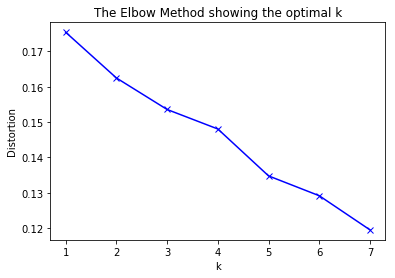

In [36]:

from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

X = Borough_grouped.drop('Borough', 1)


# k means determine k
distortions = []
K = range(1,8)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [53]:
# set number of clusters
kclusters = 4

Borough_grouped_clustering = Borough_grouped.drop('Borough', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Borough_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_ 


array([0, 0, 3, 0, 0, 2, 3, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 3, 2, 3,
       0, 0, 2, 3, 2, 3, 1, 2, 2, 2, 3], dtype=int32)

In [54]:
# add clustering labels

Borough_merged['Cluster Labels']= kmeans.labels_

Borough_merged.head()


,Borough,Inner/Outer London,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,City of London,Inner London,51.515618,-0.091998,0,Coffee Shop,Gym / Fitness Center,Hotel,Cocktail Bar,Garden,Scenic Lookout,French Restaurant,Steakhouse,Boxing Gym,Modern European Restaurant
1,Barking and Dagenham,Outer London,51.554117,0.150504,0,Bus Stop,Gas Station,Convenience Store,Grocery Store,Liquor Store,Martial Arts Dojo,Gym,Gym / Fitness Center,Park,Supermarket
2,Barnet,Outer London,51.653090,-0.200226,3,Pub,Coffee Shop,Grocery Store,Bookstore,Fast Food Restaurant,Pizza Place,Pharmacy,Soccer Stadium,Park,Gym / Fitness Center
3,Bexley London,Outer London,51.441679,0.150488,0,Pub,Toy / Game Store,Fast Food Restaurant,Chinese Restaurant,Museum,Breakfast Spot,Greek Restaurant,Tennis Court,Italian Restaurant,Steakhouse
4,Brent London,Outer London,51.563826,-0.275760,0,Coffee Shop,Clothing Store,Bar,Hotel,Supermarket,Sandwich Place,Indian Restaurant,Sporting Goods Shop,Grocery Store,Warehouse Store


In [55]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Borough_merged['Latitude'], Borough_merged['Longitude'], Borough_merged['Borough'], Borough_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Cluster Results

# Analyses to determine best London Borough cluster to recommend to Client

## Cluster "0" Results

In [56]:
Borough_merged.loc[Borough_merged['Cluster Labels'] == 0, Borough_merged.columns[[0] + [1] + list(range(5, Borough_merged.shape[1]))]]

,Borough,Inner/Outer London,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,City of London,Inner London,Coffee Shop,Gym / Fitness Center,Hotel,Cocktail Bar,Garden,Scenic Lookout,French Restaurant,Steakhouse,Boxing Gym,Modern European Restaurant
1,Barking and Dagenham,Outer London,Bus Stop,Gas Station,Convenience Store,Grocery Store,Liquor Store,Martial Arts Dojo,Gym,Gym / Fitness Center,Park,Supermarket
3,Bexley London,Outer London,Pub,Toy / Game Store,Fast Food Restaurant,Chinese Restaurant,Museum,Breakfast Spot,Greek Restaurant,Tennis Court,Italian Restaurant,Steakhouse
4,Brent London,Outer London,Coffee Shop,Clothing Store,Bar,Hotel,Supermarket,Sandwich Place,Indian Restaurant,Sporting Goods Shop,Grocery Store,Warehouse Store
7,Croydon,Outer London,Coffee Shop,Pub,Clothing Store,Hotel,Platform,Italian Restaurant,Bookstore,Park,Mediterranean Restaurant,Sandwich Place
9,Enfield,Outer London,Pub,Clothing Store,Coffee Shop,Indian Restaurant,Department Store,Pharmacy,Park,Fish & Chips Shop,Supermarket,Pizza Place
14,Harrow,Outer London,Indian Restaurant,Fast Food Restaurant,Coffee Shop,Platform,Grocery Store,Afghan Restaurant,Sandwich Place,Bus Stop,Park,Supermarket
16,Hillingdon,Outer London,Fast Food Restaurant,Chinese Restaurant,Plaza,Pharmacy,Coffee Shop,Construction & Landscaping,Park,Grocery Store,Pub,Food Stand
17,Hounslow,Outer London,Indian Restaurant,Clothing Store,Coffee Shop,Hotel,Fast Food Restaurant,Grocery Store,Pharmacy,Chinese Restaurant,Supermarket,Pub
22,Lewisham,Inner London,Pub,Clothing Store,Coffee Shop,Restaurant,Gym,Supermarket,Food Truck,Café,Bus Stop,Street Food Gathering


##  Cluster "1" Results

In [57]:
Borough_merged.loc[Borough_merged['Cluster Labels'] == 1, Borough_merged.columns[[0] + [1] + list(range(5, Borough_merged.shape[1]))]]

,Borough,Inner/Outer London,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,Sutton London,Outer London,Grocery Store,Italian Restaurant,Park,Pub,Supermarket,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck


## Cluster "2" Results

In [58]:
Borough_merged.loc[Borough_merged['Cluster Labels'] == 2, Borough_merged.columns[[0] + [1] + list(range(5, Borough_merged.shape[1]))]]

,Borough,Inner/Outer London,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Bromley,Outer London,Clothing Store,Pub,Coffee Shop,Café,Burger Joint,Indian Restaurant,Park,Pizza Place,Supermarket,Department Store
8,Ealing,Outer London,Coffee Shop,Pub,Park,Italian Restaurant,Hotel,Bakery,Burger Joint,Pizza Place,Thai Restaurant,Café
10,Greenwich,Outer London,Pub,Grocery Store,Garden,Café,Pizza Place,Park,Gym / Fitness Center,Trail,Bar,Bakery
11,Hackney,Inner London,Pub,Café,Coffee Shop,Bakery,Brewery,Cocktail Bar,Park,Vietnamese Restaurant,Gastropub,Modern European Restaurant
12,Hammersmith and Fulham,Inner London,Pub,Coffee Shop,Café,Italian Restaurant,Gym / Fitness Center,Thai Restaurant,Sandwich Place,Cocktail Bar,Bakery,Park
13,Haringey,Inner London,Turkish Restaurant,Café,Pub,Mediterranean Restaurant,Burger Joint,Furniture / Home Store,Bookstore,Grocery Store,Supermarket,Gift Shop
15,Havering London,Outer London,Pub,Coffee Shop,Café,Ice Cream Shop,Vegetarian / Vegan Restaurant,Grocery Store,Market,Bar,Yoga Studio,Flea Market
18,Islington,Inner London,Pub,Bakery,Coffee Shop,Gastropub,Park,Mediterranean Restaurant,Boutique,Burger Joint,French Restaurant,Cocktail Bar
20,Kingston upon Thames,Outer London,Pub,Coffee Shop,Café,Clothing Store,Thai Restaurant,Italian Restaurant,Burger Joint,Park,Department Store,Bakery
24,Newham,Inner London,Grocery Store,Café,Pub,Bus Stop,Fish & Chips Shop,Gym / Fitness Center,Market,Toy / Game Store,Boutique,Park


## Cluster "3" Results

In [59]:
Borough_merged.loc[Borough_merged['Cluster Labels'] == 3, Borough_merged.columns[[0] + [1] + list(range(5, Borough_merged.shape[1]))]]

,Borough,Inner/Outer London,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Barnet,Outer London,Pub,Coffee Shop,Grocery Store,Bookstore,Fast Food Restaurant,Pizza Place,Pharmacy,Soccer Stadium,Park,Gym / Fitness Center
6,Camden London,Inner London,Pub,Coffee Shop,Café,Ice Cream Shop,Music Venue,Market,Burger Joint,Bar,Vegetarian / Vegan Restaurant,Grocery Store
19,Kensington and Chelsea,Inner London,Bakery,Ice Cream Shop,Italian Restaurant,French Restaurant,Bookstore,Plaza,Burger Joint,Coffee Shop,Restaurant,Pub
21,Lambeth,Inner London,Theater,Hotel,Coffee Shop,Bar,Café,Art Gallery,Pub,Plaza,Sandwich Place,Scenic Lookout
25,Redbridge,Outer London,Gym / Fitness Center,Hotel,Metro Station,Golf Course,Pizza Place,Park,Soccer Field,English Restaurant,Eastern European Restaurant,Pub
27,Southwark,Inner London,Theater,Pub,Hotel,Coffee Shop,Park,Seafood Restaurant,Scenic Lookout,Street Food Gathering,Italian Restaurant,Portuguese Restaurant
32,Westminster,Inner London,Hotel,Café,Coffee Shop,Plaza,Monument / Landmark,Park,Outdoor Sculpture,Hotel Bar,Garden,Historic Site


# Discussion and Recommendation


**Going through the details of the venues associated with each Borough cluster i.e. the top 10 venue categories associated with the London boroughs, it becomes apparent that cluster '0' will be of most interest to the Travel Agency.**

**This is because the top 10 venue categories associated with this cluster matches the identified preferences considered to be of priority to the clients from sub-Saharan Africa countries i.e. Nigeria, Ghana, Kenya, Uganda and Zimbabwe during their visit to London UK.** 

---



# Conclusion

**This write-up provides the reader with an overview of a business problem which relates to a Travel Agency requiring access to strategic information on London Boroughs so as to enable it make appropriate arrangements for its holiday packages specifically aimed at its sub-Saharan African customers.**

**The unsupervised machine learning analyses was performed via Python scripts with support from Python Libraries like Pandas, GeoPy, Matplotlib, Scikit-learn and Folium.**

**Reliable data was collated and processed and the output result of the analyses can be said to provide a fit-for-purpose solution to the business challenges of the end client i.e. Travel Agency.**

---
